In [3]:
from collections import Counter
from Bio import SeqIO
import pandas as pd
# Counter for 3-mer counts

In [7]:
def gc_content(seq):
    seq = seq.upper() 
    gc_count = seq.count("G") +seq.count("C")
    return round((gc_count / len(seq)) * 100, 2) if len(seq) > 0 else 0
    # GC proportion for given sequence

In [9]:
def search_kmers(seq, k = 3):
    seq = seq.upper()
    return [seq[i:i + k] for i in range(len(seq) - k + 1)]
    #find all possible 3-mer combinations

In [41]:
def fasta_tool(fasta_file, gc_threshold = 30, min_length = 100):
    gene_records = list(SeqIO.parse(fasta_file, "fasta"))
    # minumum GC composition = 30% is a crucial bio feature and DNA stability
    # minimum base piar length = 100 to filter out non useful parts
    # use SeqIO attributes .id, .description, .seq to manipulate data
    
    result = []
    kmer_counter = Counter()
    # store selected sequences and useful k-mers
    
    for record in gene_records:
        seq = str(record.seq).upper()
        seq_len = len(seq)
        gc_percentage = gc_content(seq)

        if seq_len < min_length or gc_percentage < gc_threshold:
            continue
    # threshold for given seq, aiming to rule out unqualified data

        kmers = search_kmers(seq, k = 3)
        kmer_counter.update(kmers)
    # find all kmers in sequence produced by SeqIO, and store data into counter

        result.append({
            "ID": record.id,
            "Length": seq_len,
            "GC_%": gc_percentage,
            "Abstract(First_50bp)": seq[:50]
        })
    # basic info for every sequence and its abstract

    data_frame = pd.DataFrame(result)
    kmer_data_frame = pd.DataFrame(kmer_counter.most_common(10), columns = ["3mers", "Counts"])
    # our 2 forms produced from given fasta file, including 1. sequence info, 2. common 3mers
    
    data_frame.to_csv("_fasta_sequence_report.csv", index = False)
    kmer_data_frame.to_csv("most_common_kmers.csv", index = False)

    return data_frame, kmer_data_frame
    
        

In [61]:
df, kmer = fasta_tool("Geninfo_sample.fasta", gc_threshold = 30, min_length = 100)
df.head()   # sequence info
kmer        # common 3mers

,3mers,Counts
0,CCT,19
1,CTC,18
2,GGG,15
3,CCC,14
4,TCC,14
5,CCA,13
6,GCC,13
7,ATG,11
8,TGA,11
9,CAG,10


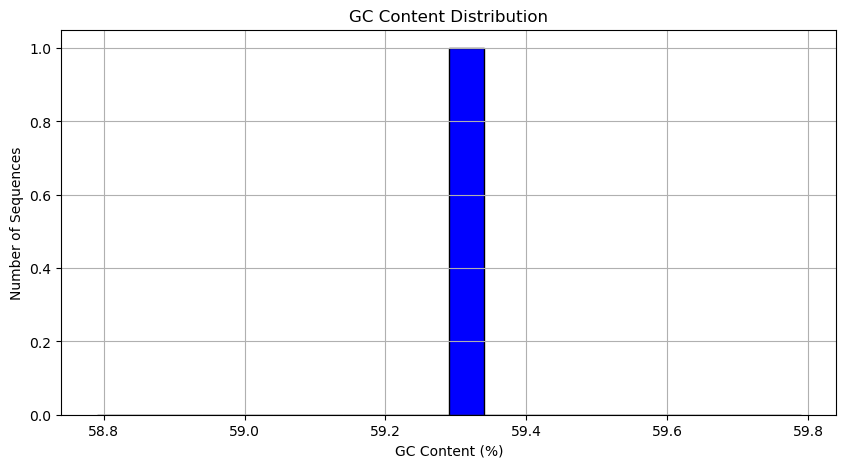

In [75]:
import matplotlib.pyplot as plt

def gc_distribution(df):
    plt.figure(figsize=(10, 5))
    plt.hist(df["GC_%"], bins=20, color="blue", edgecolor="black")
    plt.title("GC Content Distribution")
    plt.xlabel("GC Content (%)")
    plt.ylabel("Number of Sequences")
    plt.grid(True)
    plt.show()

gc_distribution(df)
# simple visualization for our output